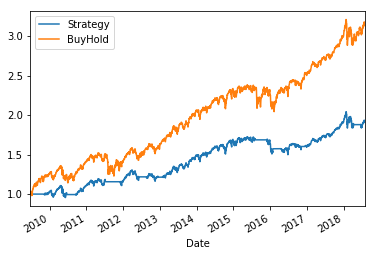

In [10]:
# Make sure the plot shows up
%matplotlib inline

# Import libraries that we need
import pandas as pd 
import numpy as np

# Read the data from disk
data = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])

# Calculate two moving averages
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()

# Set to 1 if SMA50 is above SMA100
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

# Buy a day delayed, shift the column
data['Position'] = data['Position'].shift()

# Calculate the daily percent returns of strategy
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

# Calculate cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

# Calculate index cumulative returns
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()

# Plot the result
data[['Strategy', 'BuyHold']].plot()



In [15]:
data.to_clipboard()